In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv(r'C:\Users\75833\Downloads\employee.csv')

In [3]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.shape

(9, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [7]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name" as the index.

In [8]:
data=pd.read_csv(r'C:\Users\75833\Downloads\employee.csv',index_col='name')

In [9]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.


In [10]:
data.loc[['Jack Morgan', 'Josh Wills'], :]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [11]:
data[(data['department'] == 'Sales') | (data['department'] == 'Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [12]:
data.loc[(data['performance_score'] > 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [13]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.


In [14]:
data.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [16]:
data['gender'].mode()

0    F
dtype: object

In [17]:
data['gender'].fillna('F', inplace = True)

In [18]:
for i in ['age','income']:
    data[i]=data[i].fillna(data[i].median())

In [19]:
data.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Boxplot of performance_score')

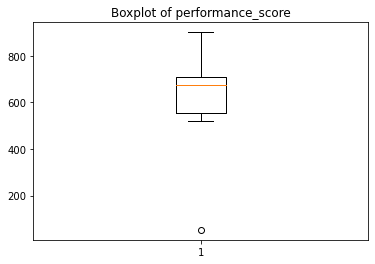

In [20]:
plt.boxplot(data['performance_score'])
plt.title('Boxplot of performance_score')

In [21]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')

In [22]:
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [23]:
IQR=Q3-Q1

In [24]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [25]:
print(low_lim)
print(up_lim)

323.5
943.5


In [26]:
Outlier=[]
for x in data ['performance_score']:
    if((x>up_lim) or (x<low_lim)):
       Outlier.append(x)

In [27]:
Outlier

[53]

In [28]:
ind1=data['performance_score']<low_lim
data.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [29]:
data.loc[ind1]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [37]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [ ]:
# Here we cant drop the outlier since there are only 9 rows present in the dataset.

# 9. Check the gender column and do Dummy encoding.


In [31]:
data['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [32]:
data1 = pd.get_dummies(data,columns=['gender'])
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,53,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(data1[['performance_score']])
data1['performance_score']=scaled_data

In [34]:
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.505565,1,0
S Kumar,45.0,16000.0,Finance,G0,-0.408053,1,0
Jack Morgan,32.0,35000.0,Finance,G2,0.285037,0,1
Ying Chin,45.0,65000.0,Sales,G3,-0.246032,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.451558,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,0.172522,1,0
James Authur,54.0,52000.0,Operations,G3,-2.509823,1,0
Josh Wills,54.0,52000.0,Finance,G3,1.306668,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.442557,0,1


In [35]:
y = data1['performance_score']
x = data1.drop(['performance_score','department', 'grade'], axis = 1)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is', mean_squared_error(y_test, predictions))
from sklearn.metrics import r2_score
print('R squared value is', r2_score(y_test, predictions))

MSE is 3.3796220538097064
R squared value is -3.597707119586808
